<a href="https://colab.research.google.com/github/SpecialAlex/TemporaryStation/blob/main/P03_02_01_DataStructure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 자료구조
Julia의 빌트인 자료구조는 Matlab, Python, R 이렇게 세 가지 언어 중에서 Python의 영향을 가장 강하게 받았다.  
상식적으로 갖춰야 할 거의 모든 함수를 구현했고, 거기에 버전 업데이트를 반복할 때마다 성능과 안정성, 편의성을 개선시키고 있다.  
자료구조에서 오는 편의성은 속도를 차치하고서라도 Matlab과 R대신 Julia를 써야 할 이유라고 해도 과언이 아니다.  
  
조자료구조, 특히 데이터를 저장하는 형태들에 대해 다룰 때는 데이터를 모아 놓은 그 객체 자체를 컬렉션(Collection)이라 부르고 그 컬렉션에 포함된 실제 데이터를 원소(Element)라 부르기도 한다.  
자료구조의 기술적인 특징이 아니라 추상적으로 데이터를 모아둔다는 의미에서는 컬렉션 대신 그냥 컨테이너(Container)라는 단어도 종종 쓰인다.  
# Linear Data Structure, 선형 데이터 구조
선형 데이터 구조란 쉽게 말해서 데이터가 순차적으로 나열된 형태의 데이터 구조로, 대개 컬렉션 x가 선형 구조라면 x[1]과 같이 정수를 통해 특정 인덱스(Index)의 데이터의 원소에터접근할 수 있는 것이 특징이다.  
선형 구조에 대해서는 다음과 같은 여러 함수가 정의되어 있다.  
만약 x = [3, 1, 4, 1, 5]라면, 적용되는 함수와 출력 결과는 다음과 같다.
|함수|설명|출력결과|
|---|---|---|
|identity|항등 함수로 입력받은 인수를 그대로 출력|[3, 1, 4, 1, 5]|
|length|컨테이너 길이 반환|5|
|unique|컨테이너의 중복 원소 제거|[3, 1, 4, 5]|
|maximum|가장 큰 원소 반환|5|
|minimum|가장 작은 원소 반환|1|
|extrema|극값, 즉 최댓값과 최솟값 반환|(1, 5)|
|sum|모든 원소의 합 계산|14|
|prod|모든 원소의 곱 계산|60|
|sort|컨테이너 정렬|[1, 1, 3, 4, 5]|
|argmax|가장 큰 원소의 인덱스 반환|5|
|argmin|가장 작은 원소의 인덱스 반환|2|

In [1]:
x = [ 3, 1, 4, 1, 5 ]

println(identity(x))
println(length(x))
println(unique(x))
println(maximum(x))
println(minimum(x))
println(extrema(x))
println(sum(x))
println(prod(x))
println(sort(x))
println(argmax(x))
println(argmin(x))

[3, 1, 4, 1, 5]
5
[3, 1, 4, 5]
5
1
(1, 5)
14
60
[1, 1, 3, 4, 5]
5
2


특히 `argmax()`와 `argmin()`은 선형 구조에서만 동작한다.  
나머지 함수들이 꼭 선형 구조에서만 정의되는 것은 아니지만, 가장 간단한 구조인 만큼 대부분의 상식적인 함수들은 사용할 수 있다고 봐도 무방하다.  
  
보통 선형 데이터 구조의 가장 간단한 예로는 배열(Array)과 튜블(Tuple)을 꼽는다.  
Julia에서 이들은 문법적인 차이 외에도 실제 쓰임새와 개념 측면에서 명확하게 구분된다.  
특히 배열은 이미 문법에서 벡터, 행렬, 텐서로 많이 다뤄봤지만 자료형(Type)에 대해 알고 나면 새삼 새로운 자료구조로 기능할 수 있다.
## Mutable Array, 가변 배열
가변 배열, 혹은 동적 배열(Dynamic Array)이란 배열의 크기가 변할 수 있는 배열을 말한다.  
가변 배열은 미리 크기를 정해두지 않고 원소를 추가하거나 제거할 수 있으며 그 대표적인 예가 바로 스택(Stack)과 큐(Queue) 이다.  
스택은 데이터를 후입선출(LIFO, Last In First Out)로 저장하는 방식을 취하며, `push!`함수를 통해 배열의 가장 뒤에 원소를 추가하고 `pop!`함수를 통해 가장 마지막 원소를 배열에서 꺼내 획득한다.

In [2]:
pi_ = [ 3, 1 ]

2-element Vector{Int64}:
 3
 1

In [3]:
push!(pi_, 4)

3-element Vector{Int64}:
 3
 1
 4

In [4]:
push!(pi_, 5)

4-element Vector{Int64}:
 3
 1
 4
 5

In [5]:
five = pop!(pi_)

5

In [6]:
pi_

3-element Vector{Int64}:
 3
 1
 4

In [7]:
five

5

큐의 경우 선입선출(FIFO, First In First Out)방식으로 동작한다.  
`popfirst!`함수는 `pop!`과 같은 기능을 하되 가장 앞에 있는 원소를 제거 및 획득한다는 점이 다르다.  
마찬가지로 `push!`와 같지만 배열의 맨 앞에 원소를 추가하는 `pushfirst!`함수도 있다.

In [8]:
popfirst!(pi_)

3

In [9]:
pushfirst!(pi_, 2)

3-element Vector{Int64}:
 2
 1
 4

배열을 스택과 큐처럼 사용할 수 있는 함수가 모두 주어져 있고, 삽입과 삭제가 가장 앞과 뒤 양쪽에서 가능할 때 이러한 자료구조를 데크(DEqueue, Doubly Ended queue)라고 부르기도 한다.  
  
마지막으로 배열과 배열을 붙이는 함수 `append!` 정도가 유용하게 쓰인다.  
지금까지 봤던 것처럼 느낌표(`!`)가 붙은 함수들은 반환값을 따로 주지 않을 수 있고 가장 앞에 오는 인수에 변화를 주는 성질이 있다.  
이는 느낌표 관습(Bang Convention)이라고 해서 Julia전반에서 통용되는 규칙이다.

In [10]:
odd = [ 1, 3, 5 ]
even = [ 0, 2, 4 ]

@show append!(odd, even)

append!(odd, even) = [1, 3, 5, 0, 2, 4]


6-element Vector{Int64}:
 1
 3
 5
 0
 2
 4

In [11]:
odd

6-element Vector{Int64}:
 1
 3
 5
 0
 2
 4

In [12]:
even

3-element Vector{Int64}:
 0
 2
 4

`append!`는 단순하게 두 배열을 합치는 것이 아니라 하나의 배열에 다른 배열을 이어붙이는 기능을 한다.  
예시에서 `odd`배열에는 `even`배열이 추가되는 변형이 일어났지만 `even`배열에는 아무 영향이 없음을 확인할 수 있다.  
마찬가지로, 느낌표 관습에 따라 반환값을 따로 받아주지 않아도 정상적으로 동작한다.  
  
지금까지 확인한 함수들를 정리하면 다음과 같다.
|함수|설명|
|---|---|
|push!(A, B)|배열 A의 가장 뒤에 원소 a를 삽입한다.|
|B = pop!(A)|배열 A의 마지막 원소가 제거되고, B에 저장된다.|
|pushfirst!(A, a)|배열 A의 가장 앞에 원소 a를 삽입한다.|
|B = popfirst!(A)|배열 A의 첫 번째 원소가 제거되고, B에 저장된다.|
|append!(A, B)|배열 A의 뒤로 배열 B의 원소들이 추가된다.|


## List, 리스트
앞서 벡터는 1차원 배열이라고 했다.  
그 원소의 타입이 `Any`인 경우 Python의 리스트(List)처럼 어떤 원소든지 포함할 수 있는 배열로 다룰 수 있다.

In [14]:
list = [ 7, [2, 1], "Alice", + ]

4-element Vector{Any}:
 7
  [2, 1]
  "Alice"
  + (generic function with 196 methods)

Julia는 리스트보다 일반적인 표현과 구현을 갖추었기 때문에, 공식적으로는 굳이 리스트라는 단어를 사용하지 않는다.  
리스트, 정확한 표현으로 `Vector{Any}`는 당연히 컬렉션의 컬렉션으로 정의할 수 있으므로 사실상 비선형이기도 하다.  
예를 들어 대표적인 비선형 데이터 구조인 그래프(Graph)는 인접 정점(Adjacent Vertex)의 배열을 원소로 가지는 배열을 정의함으로서 표현할 수 있다.  
  
<html>
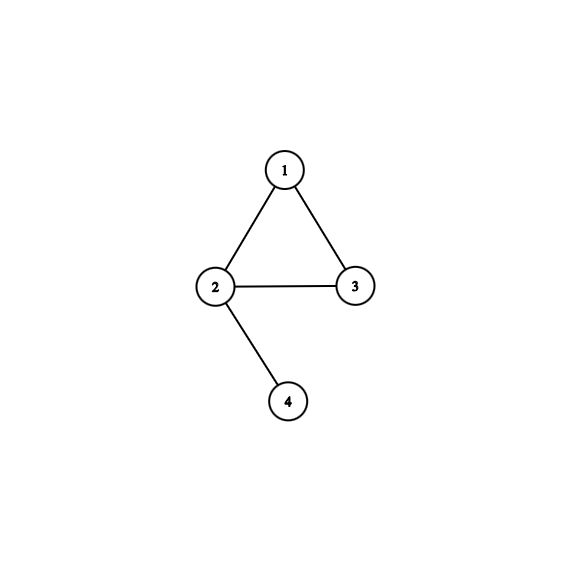
</html>

> https://csacademy.com/app/graph_editor

그래프는 정점(Vertex)과 정점과 정점을 잇는 간선(Edge)으로 이루어진 자료구조로 볼 수 있다.  
그래프를 자료구조로 표현할 때는 행렬 표현이나 인접 정점의 리스트를 주로 사용한다.  

In [16]:
G = [   [2, 3]
      , [1, 3, 4]
      , [2, 3]
      , [2] ]

4-element Vector{Vector{Int64}}:
 [2, 3]
 [1, 3, 4]
 [2, 3]
 [2]

비선형처럼 보이지만 여전히 선형인 데이터 구조를 말할 땐 환형 연결 리스트(Circular Linked List)가 빠질 수 없다.  
Julia에서 문법적으로 환형 연결 리스트 그 자체를 지원하지는 않지만, `circshift()`함수를 통해 사실상 환형 리스트를 사용할 수 있다.

In [17]:
p = [ 2, 3, 5, 7, 11, 13 ]

@show circshift(p, 2)

circshift(p, 2) = [11, 13, 2, 3, 5, 7]


6-element Vector{Int64}:
 11
 13
  2
  3
  5
  7

In [18]:
@show circshift(p, -1)

circshift(p, -1) = [3, 5, 7, 11, 13, 2]


6-element Vector{Int64}:
  3
  5
  7
 11
 13
  2

Julia의 `circshift()`함수가 특히 유용한 이유는 배열의 끝과 끝을 이어서 회전시켜주는 연산이 다차원 배열에 대해서도 일반화되어 있기 때문이다.  
예를 들어, 행렬은 2차원 배열이고 차원마다 몇 칸씩 움직일지에 대해 정수의 벡터를 줄 수 있다.

In [19]:
M = [ 3 4 7; 1 5 8; 9 6 2 ]

3×3 Matrix{Int64}:
 3  4  7
 1  5  8
 9  6  2

In [22]:
# 아래 circshift에 인자로 들어간 행열은 다음과 같의 의미를 가진다
# [Row(행), Column(열)]
# 따라서 아래 코드에서 Row는 0이기 때문에
# "3 4 7"은 Row index 1로 그대로 위치하면서 Column은 -1이기 때문에 왼쪽으로 한칸 이동하여 "3 4 7" 에서 순서가 "4 7 3"이 된다.
circshift(M, [0, -1])

3×3 Matrix{Int64}:
 4  7  3
 5  8  1
 6  2  9

In [21]:
# 위 주석과 같이 행렬 인자는 Row, Column 순으로 진행되기 때문에
# 아래 코드에서 Row는 1이기 때문에 Row index가 각각 1씩 증가해
# Row index 1위치의 "3 4 7"은 Row index 2위치가 되어, Row index 3에 위치했던 "9 6 2" 가 Row index 1로 오게 된다.
# 그리고 Column은 1이기 때문에 오른쪽으로 한칸 이동하여 "3 4 7"은 "7 3 4"가 된다.
# 이렇게 하면 최종적으로 Row index 1위치에 오게 되는 원소는 "2 9 6"이 된다.
circshift(M, [1, 1])

# >> 참조 <<
# 줄리아다운 표현법은 튜플(Tuple)을 사용하는 것이다.
# 줄리아에서는 보통 [0, -1]처럼 배열(Vector)을 넣기도 하지만, 수정이 불필요한 고정된 값의 경우
# 튜플(Tuple)인 (0, -1)을 사용하는 것이 관례적이며 성능상 미세하게 유리할 때가 있다.
# ====================
# # 성능과 관례상 추천되는 방식 (괄호 형태)
# circshift(M, (0, -1))
# circshift(M, (1, 1))
# ====================
# 튜플은 다음 항에서 이어진다.

3×3 Matrix{Int64}:
 2  9  6
 7  3  4
 8  1  5